In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [11]:
#first, let's look at the set of tickers that make up the S&P 500
splist = pd.read_excel('sp500_tickerlist.xlsx')

In [12]:
splist.shape

(504, 8)

# Why are there 504 tickers and not 500 in the S&P 500? The list includes the SPY ticker itself, plus 3 companies that have 2 tickers each: Google, News Corp and Fox Corporation, totalling 504. 

In [13]:
splist.columns

Index(['ticker', 'security', 'gics_sector', 'gics_sub_industry', 'hq_location',
       'date_added', 'cik', 'founded'],
      dtype='object')

In [14]:
#quick check for dupes - just in case. 
len(splist.ticker.unique())

504

NOTE on the time series. For this project we are looking at 5 quarters between 2nd quarter 2022 and 2nd quarter 2023. 
The reason I chose this time is because per the SPY, we get a downward movement, a flat movement and also an upward movement. So there is some variation.  


In [15]:
SPY = pd.read_csv('TimeSeriesAdjusted/TS_for_SPY.csv',sep=',')
SPY=SPY[SPY['date']<'2023-07-01']
SPY.head()

,date,open_price,high_price,low_price,close_price,adjusted_close_price,volume,dividend_amount,split coefficient,ticker,rolling62_adjustedclose
0,2022-05-02,412.07,415.92,405.0200,414.48,397.830597,158312526.0,0.0,1.0,SPY,420.504915
1,2022-05-03,415.01,418.93,413.3600,416.38,399.654275,100028190.0,0.0,1.0,SPY,419.892344
2,2022-05-04,417.08,429.66,413.7099,429.06,411.824927,141106960.0,0.0,1.0,SPY,419.641986
3,2022-05-05,424.55,425.00,409.4400,413.81,397.187510,172929106.0,0.0,1.0,SPY,419.123130
4,2022-05-06,411.10,414.80,405.7300,411.34,394.816729,151770811.0,0.0,1.0,SPY,418.588260


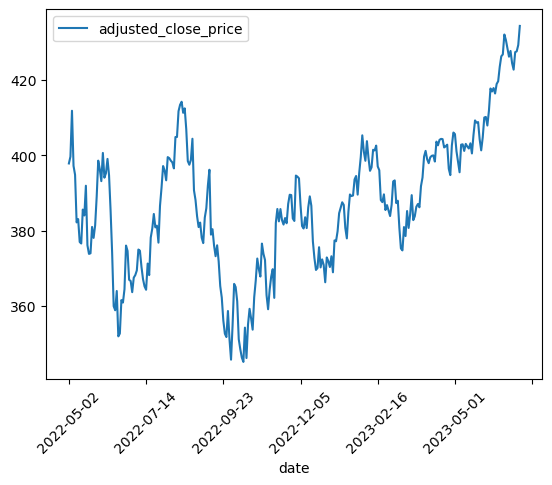

In [16]:
SPY.plot(x='date',y='adjusted_close_price',kind='line')
plt.xticks(rotation=45)
plt.show()

Observing the rolling 62 day trend shows a clearer pattern of the SPY going down in the beginning of our target period, then having a someone flat middle period, then clearly going back up towards the  latter half of our target period

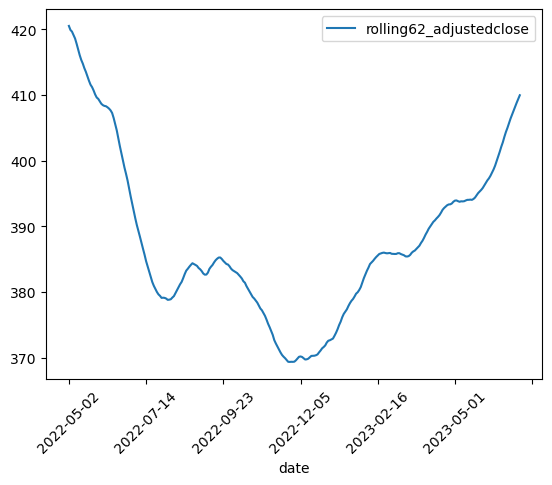

In [17]:

SPY.plot(x='date',y='rolling62_adjustedclose',kind='line')
plt.xticks(rotation=45)
plt.show()

# Looking at the consolidated time series data (5 dates per ticker, each corresponding to a quarter end for the time period we want to look at)

In [18]:
#the consolidated time series data (only using 5 dates per ticker, each an end of quarter)
df_TS = pd.read_excel('../wrangling/Consolidated_TimeSeries_Data.xlsx')
print(df_TS.shape)
df_TS.columns

(2988, 7)


Index(['ticker', 'rolling62_adjustedclose', 'next_rolling62_adjustedclose',
       'sequence', 'return', 'SPYreturn', 'better_than_spy'],
      dtype='object')

#NOTE: the following 4 tickers were added AFTER the period of study that we are looking at: GEV,
SW, SOLV, VLTO, so these would not be in either the consolidated time series data OR any of the financial statement 
data


In [19]:
len(df_TS['ticker'].unique())

498

In [20]:
df_TS.describe()

,rolling62_adjustedclose,next_rolling62_adjustedclose,sequence,return,SPYreturn,better_than_spy
count,2988.000000,2490.000000,2988.000000,2490.000000,2490.000000,2988.000000
mean,159.980231,161.348252,2.500000,0.018479,0.021601,0.389558
std,295.135343,302.570463,1.708111,0.108279,0.040190,0.487732
min,4.561065,5.753419,0.000000,-0.511689,-0.028612,0.000000
25%,55.256756,55.078959,1.000000,-0.048612,-0.025087,0.000000
50%,98.513816,98.543469,2.500000,0.013376,0.042049,0.000000
75%,186.922974,189.674896,4.000000,0.077524,0.055885,1.000000
max,6209.087097,6209.087097,5.000000,0.856710,0.063772,1.000000


In [21]:
df_TS=df_TS[df_TS['sequence']!=4] #no need to use ending quarter. we pull what we need from this later. 
nans = df_TS.isna().sum()
nans

ticker                            0
rolling62_adjustedclose           0
next_rolling62_adjustedclose    498
sequence                          0
return                          498
SPYreturn                       498
better_than_spy                   0
dtype: int64

ticker GEHC was added as of 1-1-23. 

In [22]:
df_TS.sort_values('return')
df_TS.head()

,ticker,rolling62_adjustedclose,next_rolling62_adjustedclose,sequence,return,SPYreturn,better_than_spy
0,PEG,61.997594,59.234067,0,-0.044575,-0.025087,0
1,PEG,59.234067,53.818506,1,-0.091426,-0.028612,0
2,PEG,53.818506,56.672236,2,0.053025,0.042049,1
3,PEG,56.672236,58.973906,3,0.040614,0.055885,0
5,PEG,58.556120,NaN,5,NaN,NaN,0


In [23]:
dfml = pd.read_excel('../model/ml_data.xlsx')
dfml.shape

(2480, 108)

In [24]:
s1 = dfml[dfml['sequence']!=4]
s1.head()

,ticker,gics_sector,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,days_in_inventory_ratio,gross_margin_ratio,operating_margin_ratio,roa_ratio,roe_ratio,sequence,rolling62_adjustedclose,next_rolling62_adjustedclose,return,better_than_spy
0,MMM,Industrials,45634000000,14514000000,2722000000,2.722000e+09,5.645000e+09,4.914000e+09,3.112000e+10,9319000000,...,385.998429,46.269231,1.410256,0.001709,0.005676,0,107.672949,98.772047,-0.082666,0
1,MMM,Industrials,46176000000,14895000000,3404000000,3.404000e+09,5.615000e+09,4.722000e+09,3.128100e+10,9196000000,...,426.489530,1.008292,1.076963,0.083572,0.274077,1,98.772047,92.931288,-0.059134,0
2,MMM,Industrials,46455000000,14688000000,3655000000,3.655000e+09,5.372000e+09,4.532000e+09,3.412400e+10,9178000000,...,443.134678,6.458410,1.168207,0.011646,0.036748,2,92.931288,86.888200,-0.065027,0
3,MMM,Industrials,46886000000,14963000000,3824000000,3.824000e+09,5.306000e+09,4.638000e+09,3.192300e+10,9247000000,...,423.433232,3.502049,1.271516,0.020816,0.063799,3,86.888200,79.383355,-0.086374,0
5,AOS,Industrials,3321400000,1631200000,359400000,4.594000e+08,4.930000e+08,6.215000e+08,1.690200e+09,592700000,...,311.449327,2.649762,1.410460,0.037996,0.070404,0,56.787326,54.645593,-0.037715,0


In [25]:
nans = s1.isna().sum()
nans.sort_values

<bound method Series.sort_values of ticker                                   0
gics_sector                              0
totalAssets                              0
totalCurrentAssets                       0
cashAndCashEquivalentsAtCarryingValue    0
                                        ..
sequence                                 0
rolling62_adjustedclose                  0
next_rolling62_adjustedclose             0
return                                   0
better_than_spy                          0
Length: 108, dtype: int64>

In [26]:
X= pd.read_excel('../model/X.xlsx')
X.shape

(1484, 115)

In [27]:
nans = X.isna().sum()
nans.sort_values

<bound method Series.sort_values of ticker                                0
gics_sector_Consumer Discretionary    0
gics_sector_Consumer Staples          0
gics_sector_Energy                    0
gics_sector_Financials                0
                                     ..
shortTermInvestments                  0
otherNonCurrentAssets                 0
incomeBeforeTax                       0
gross_margin_ratio                    0
changeInInventory                     0
Length: 115, dtype: int64>

checking timeseries meta data


In [28]:
ts = pd.read_excel('ts_meta_check.xlsx')
ts.shape

(504, 3)

In [29]:
ts.columns

Index(['Unnamed: 0', 'ticker', 'last_refreshed'], dtype='object')

In [30]:
last_refreshed = ts.last_refreshed
print(last_refreshed.min(),last_refreshed.max())
#all 504 refreshed on 2-14-24 when data was pulled 

2025-02-19 2025-02-19


# looking at wrangled consolidated data 

In [31]:
#BS = balance sheet, CF = Cash Flow, IS = Income statement 
#/home/milo/Documents/GitHub/Project4/wrangling
BS = pd.read_excel('../wrangling/Consolidated_BalanceSheet_Data.xlsx')
BS.describe()

,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
count,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,...,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03,6.694000e+03
mean,8.923240e+10,1.801434e+10,6.916835e+09,9.384889e+09,-1.034511e+10,3.271761e+09,2.809552e+10,1.144023e+10,8.534381e+09,1.231870e+10,...,1.754605e+09,1.005433e+10,1.539493e+10,4.333612e+09,1.260131e+10,1.958519e+10,7.416200e+09,1.714935e+10,2.271848e+09,7.280990e+08
std,2.847001e+11,4.743716e+10,3.521768e+10,4.134893e+10,2.013778e+11,7.180301e+09,4.447134e+10,2.518001e+10,2.270403e+10,2.359387e+10,...,5.759111e+09,1.992163e+10,4.571588e+10,5.492497e+10,6.412437e+10,4.256090e+10,2.098932e+10,4.472640e+10,9.836968e+09,1.838324e+09
min,1.004900e+02,1.004900e+02,-9.100000e+07,-9.100000e+07,-1.384204e+13,-9.560000e+08,-1.441600e+10,-1.365000e+10,-1.240100e+09,-3.990000e+08,...,0.000000e+00,0.000000e+00,-4.230000e+08,-3.782570e+11,0.000000e+00,-2.355200e+10,-5.130100e+10,-3.407600e+10,0.000000e+00,1.000000e+02
25%,1.236232e+10,2.603400e+09,4.400000e+08,4.747750e+08,1.110000e+08,3.430502e+08,5.262096e+09,7.320000e+08,5.872250e+08,1.002351e+09,...,3.100000e+07,6.170885e+08,1.874023e+09,2.050245e+08,2.768100e+08,3.482045e+09,0.000000e+00,1.262370e+09,1.398250e+06,1.519224e+08
50%,2.624600e+10,5.615498e+09,1.290124e+09,1.488500e+09,8.730000e+08,1.145250e+09,1.232000e+10,2.524478e+09,2.143533e+09,4.468562e+09,...,4.000000e+08,3.653750e+09,5.911933e+09,7.674000e+08,7.625000e+08,8.346750e+09,7.071000e+08,5.415343e+09,8.000000e+06,3.154345e+08
75%,6.392464e+10,1.431629e+10,3.753250e+09,4.685500e+09,2.752750e+09,2.972500e+09,3.067688e+10,9.441518e+09,7.241375e+09,1.167625e+10,...,1.192000e+09,1.089650e+10,1.412950e+10,2.261554e+09,2.361500e+09,1.860650e+10,5.894600e+09,1.579658e+10,2.493000e+08,6.591658e+08
max,4.210048e+12,7.695960e+11,7.385690e+11,7.598690e+11,7.064760e+11,6.657300e+10,3.977190e+11,2.995430e+11,2.785100e+11,3.230730e+11,...,1.206830e+11,3.080000e+11,2.442288e+12,2.060822e+12,8.468390e+11,6.290690e+11,2.578910e+11,6.765240e+11,2.410000e+11,8.900000e+10


In [32]:
BS.groupby('quarter').count()

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,ticker
quarter,,,,,,,,,,,,,,,,,,,,,
2021Q3,494,494,494,494,494,494,494,494,494,494,...,494,494,494,494,494,494,494,494,494,494
2021Q4,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
2022Q1,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
2022Q2,498,498,498,498,498,498,498,498,498,498,...,498,498,498,498,498,498,498,498,498,498
2022Q3,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
2022Q4,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
2023Q1,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
2023Q2,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
2023Q3,501,501,501,501,501,501,501,501,501,501,...,501,501,501,501,501,501,501,501,501,501


In [33]:
CF = pd.read_excel('../wrangling/Consolidated_CashFlowStatements_Data.xlsx')
CF.describe()

,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,profitLoss,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
count,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,...,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03
mean,1.359666e+09,8.027205e+08,2.848321e+08,9.866124e+07,4.134951e+08,3.934494e+08,5.631749e+08,2.036890e+07,3.730885e+07,9.673358e+08,...,3.657445e+08,4.271111e+06,1.763901e+07,6.363297e+08,5.202829e+06,-4.032553e+08,5.368530e+05,2.002281e+08,-4.834851e+06,9.272974e+08
std,5.168784e+09,1.532034e+10,3.931569e+09,2.093075e+09,5.693974e+09,9.700874e+08,1.485693e+09,1.352477e+09,2.528688e+09,2.921284e+09,...,7.071174e+08,2.616816e+07,1.217445e+08,2.525988e+09,8.939161e+07,1.613301e+09,7.831615e+06,5.925939e+09,4.350462e+07,2.742936e+09
min,-1.541580e+11,-7.346900e+11,-1.460000e+08,-4.034900e+10,-8.706700e+10,-3.225000e+09,-1.960870e+09,-4.971900e+10,-6.351800e+10,-4.324200e+10,...,-3.054200e+09,0.000000e+00,-8.372340e+08,-7.674000e+09,-4.687500e+08,-2.652200e+10,0.000000e+00,-9.265200e+10,-4.640000e+08,-4.362100e+10
25%,2.262892e+08,2.199025e+07,0.000000e+00,-6.033475e+07,-3.361475e+07,4.800000e+07,4.839375e+07,-6.907138e+07,-3.800000e+07,1.514610e+08,...,4.940000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.030000e+08,0.000000e+00,-1.880000e+08,-2.300000e+06,1.510000e+08
50%,5.280000e+08,9.800000e+07,0.000000e+00,1.030000e+07,3.625000e+07,1.390000e+08,1.450930e+08,5.910000e+05,7.240167e+06,3.483500e+08,...,1.410000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.700000e+07,0.000000e+00,1.895000e+07,0.000000e+00,3.468750e+08
75%,1.286000e+09,3.710000e+08,0.000000e+00,1.676222e+08,2.400000e+08,3.570000e+08,4.430712e+08,9.900000e+07,1.121110e+08,8.899250e+08,...,3.420680e+08,0.000000e+00,0.000000e+00,2.400000e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.974960e+08,7.000000e+05,8.550500e+08
max,1.012220e+11,4.667000e+11,9.390400e+10,4.106400e+10,2.492960e+11,1.637200e+10,2.783400e+10,2.294100e+10,1.380450e+11,4.701200e+10,...,1.378800e+10,3.450000e+08,3.219123e+09,3.870500e+10,2.500000e+09,9.547000e+09,2.640000e+08,1.456670e+11,2.290000e+08,3.964600e+10


In [34]:
print(CF.shape)
CF.groupby('quarter').count()

(6716, 31)


,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,ticker
quarter,,,,,,,,,,,,,,,,,,,,,
2021Q3,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
2021Q4,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
2022Q1,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
2022Q2,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
2022Q3,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
2022Q4,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
2023Q1,501,501,501,501,501,501,501,501,501,501,...,501,501,501,501,501,501,501,501,501,501
2023Q2,502,502,502,502,502,502,502,502,502,502,...,502,502,502,502,502,502,502,502,502,502
2023Q3,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503


#HOUSTON WE HAVE A PROBLEM. In the above datafrane, it looks like quarters have more than 503 count. Not counting the SPY, which would not have financials 
itself, we should never have more than 503 in any quarter. That means either there is duplication, or - more likely - some companies resubmitted data later. 

What this means is that we'll need to create something to differentiate between the rows. 
If 1 company has 2 rows of financial data in the same quarter, we can use the one that has more data. 
I'm defining this to mean less NULL columns and also picking a non-zero value over a zero value as the former is 
more likely. 



In [35]:
#TODO incorporate this to only have 1 row per ticker per quarter and pick the row with more data.
def calculate_non_blank_columns_in_row(row):
    '''INPUT 
    dataframe row
    OUTPUT value for new column that sums up the non NULL values in that row
    we can then insert this output in a new column by applying a function to the dataframe. 
    This can help us to only have 1 row per ticker per quarter'''
    #simple method to get non null count across a row
    return row.notna().sum() 

#testing the above function  on AAPL, which was one of the companies that had 2 rows for the same quarter. 
df = pd.read_csv('CashFlowStatements/AV_CF_AAPL.csv',sep='|')
print(df.shape) #shape of unedited data
df = df.sort_values(by=['ticker', 'fiscalDateEnding'], ascending=[True, True])
df[df['fiscalDateEnding']>'2022-01-01']

(63, 30)


,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,ticker
12,2022-03-31,USD,28166000000,8.750000e+08,NaN,-2.374600e+10,-2.169400e+10,2737000000,2514000000,-1.993100e+10,...,NaN,NaN,0.000000e+00,NaN,-22631000000,NaN,2.501000e+10,NaN,25010000000,AAPL
11,2022-06-30,USD,22892000000,5.040000e+08,NaN,-6.627000e+09,-3.402000e+09,2805000000,2102000000,-3.165000e+09,...,NaN,NaN,0.000000e+00,NaN,-21865000000,NaN,1.944200e+10,NaN,19442000000,AAPL
10,2022-09-30,USD,24127000000,2.755000e+09,NaN,2.142000e+10,2.146800e+10,2865000000,3289000000,1.869300e+10,...,NaN,NaN,5.465000e+09,NaN,-24428000000,NaN,-3.884000e+09,NaN,20721000000,AAPL
9,2022-12-31,USD,34005000000,7.030000e+08,NaN,-2.186000e+09,-6.890000e+08,2916000000,3787000000,-6.595000e+09,...,NaN,0.0,0.000000e+00,NaN,-19475000000,NaN,-3.003000e+09,NaN,29998000000,AAPL
7,2023-03-31,USD,28560000000,NaN,NaN,-1.682100e+10,-1.705200e+10,2898000000,2916000000,-1.778600e+10,...,NaN,NaN,NaN,NaN,-19594000000,NaN,5.155000e+09,NaN,24160000000,AAPL
8,2023-03-31,USD,28560000000,NaN,NaN,NaN,NaN,2898000000,2916000000,1.778600e+10,...,NaN,0.0,0.000000e+00,NaN,0,NaN,5.155000e+09,NaN,24160000000,AAPL
6,2023-06-30,USD,26380000000,NaN,NaN,5.203000e+09,4.454000e+09,3052000000,2093000000,3.661000e+09,...,NaN,0.0,0.000000e+00,NaN,0,NaN,2.769000e+09,NaN,19881000000,AAPL
5,2023-09-30,USD,21598000000,3.113000e+09,NaN,1.494600e+10,2.100600e+10,2653000000,2163000000,2.113700e+10,...,NaN,0.0,0.000000e+00,NaN,-21003000000,NaN,8.390000e+08,NaN,22956000000,AAPL
4,2023-12-31,USD,39895000000,NaN,NaN,-8.407000e+09,-9.530000e+09,2848000000,2392000000,-1.112400e+10,...,NaN,NaN,0.000000e+00,NaN,-20139000000,NaN,NaN,NaN,33916000000,AAPL
3,2024-03-31,USD,22690000000,NaN,NaN,-1.174000e+10,-5.976000e+09,2836000000,1996000000,-8.767000e+09,...,NaN,NaN,0.000000e+00,NaN,-23205000000,NaN,NaN,NaN,23636000000,AAPL


In [36]:
df['row_non_blank_count'] = df.apply(calculate_non_blank_columns_in_row, axis=1)
print(df.shape) #shape after applying function-- we added the completeness column

df = df.sort_values(by=['ticker', 'fiscalDateEnding','row_non_blank_count'], ascending=[True, True, False])
df = df.drop_duplicates(subset=['ticker', 'fiscalDateEnding'], keep='first')  # Keep first (the more complete one)
print(df.shape) #shape after dropping the row with more NULLS if in the same quarter. 

(63, 31)
(62, 31)


In [37]:
df[df['fiscalDateEnding']>'2022-01-01']

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,ticker,row_non_blank_count
12,2022-03-31,USD,28166000000,8.750000e+08,NaN,-2.374600e+10,-2.169400e+10,2737000000,2514000000,-1.993100e+10,...,NaN,0.000000e+00,NaN,-22631000000,NaN,2.501000e+10,NaN,25010000000,AAPL,23
11,2022-06-30,USD,22892000000,5.040000e+08,NaN,-6.627000e+09,-3.402000e+09,2805000000,2102000000,-3.165000e+09,...,NaN,0.000000e+00,NaN,-21865000000,NaN,1.944200e+10,NaN,19442000000,AAPL,23
10,2022-09-30,USD,24127000000,2.755000e+09,NaN,2.142000e+10,2.146800e+10,2865000000,3289000000,1.869300e+10,...,NaN,5.465000e+09,NaN,-24428000000,NaN,-3.884000e+09,NaN,20721000000,AAPL,23
9,2022-12-31,USD,34005000000,7.030000e+08,NaN,-2.186000e+09,-6.890000e+08,2916000000,3787000000,-6.595000e+09,...,0.0,0.000000e+00,NaN,-19475000000,NaN,-3.003000e+09,NaN,29998000000,AAPL,24
7,2023-03-31,USD,28560000000,NaN,NaN,-1.682100e+10,-1.705200e+10,2898000000,2916000000,-1.778600e+10,...,NaN,NaN,NaN,-19594000000,NaN,5.155000e+09,NaN,24160000000,AAPL,21
6,2023-06-30,USD,26380000000,NaN,NaN,5.203000e+09,4.454000e+09,3052000000,2093000000,3.661000e+09,...,0.0,0.000000e+00,NaN,0,NaN,2.769000e+09,NaN,19881000000,AAPL,23
5,2023-09-30,USD,21598000000,3.113000e+09,NaN,1.494600e+10,2.100600e+10,2653000000,2163000000,2.113700e+10,...,0.0,0.000000e+00,NaN,-21003000000,NaN,8.390000e+08,NaN,22956000000,AAPL,24
4,2023-12-31,USD,39895000000,NaN,NaN,-8.407000e+09,-9.530000e+09,2848000000,2392000000,-1.112400e+10,...,NaN,0.000000e+00,NaN,-20139000000,NaN,NaN,NaN,33916000000,AAPL,21
3,2024-03-31,USD,22690000000,NaN,NaN,-1.174000e+10,-5.976000e+09,2836000000,1996000000,-8.767000e+09,...,NaN,0.000000e+00,NaN,-23205000000,NaN,NaN,NaN,23636000000,AAPL,21
2,2024-06-30,USD,28858000000,NaN,NaN,4.978000e+09,3.294000e+09,2850000000,2151000000,2.094000e+09,...,NaN,0.000000e+00,NaN,-26522000000,NaN,NaN,NaN,21448000000,AAPL,21


In [38]:
df.head()

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,ticker,row_non_blank_count
62,2009-09-30,USD,3110000000,NaN,NaN,NaN,NaN,197000000,459000000,NaN,...,187000000.0,NaN,NaN,187000000,NaN,-3.420000e+08,NaN,2532000000,AAPL,14
61,2009-12-31,USD,5781000000,NaN,NaN,1.878000e+09,-1.970000e+08,209000000,376000000,-2.710000e+08,...,374000000.0,NaN,NaN,374000000,NaN,2.346000e+09,NaN,3378000000,AAPL,17
60,2010-03-31,USD,2330000000,NaN,NaN,-1.606000e+09,-2.510000e+08,216000000,274000000,-2.110000e+08,...,160000000.0,NaN,NaN,160000000,NaN,2.409000e+09,NaN,3074000000,AAPL,17
59,2010-06-30,USD,4801000000,NaN,NaN,3.107000e+09,2.341000e+09,273000000,595000000,1.817000e+09,...,199000000.0,NaN,NaN,199000000,NaN,-3.130000e+08,NaN,3253000000,AAPL,17
58,2010-09-30,USD,5683000000,NaN,NaN,4.923000e+09,3.683000e+09,329000000,760000000,3.525000e+09,...,179000000.0,NaN,NaN,179000000,NaN,1.556000e+09,NaN,4308000000,AAPL,17


In [39]:
IS = pd.read_excel('../wrangling/Consolidated_IncomeStatements_Data.xlsx')
IS.describe()

,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
count,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,...,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03
mean,3.091034e+09,8.356950e+09,5.345432e+09,4.081543e+09,1.313325e+09,1.081920e+09,3.605989e+08,1.792516e+09,3.429980e+07,8.842651e+07,...,1.039444e+08,2.610078e+08,1.137542e+09,2.118354e+08,2.764241e+08,9.411322e+08,8.812408e+08,1.443153e+09,1.727126e+09,9.257049e+08
std,9.091180e+09,1.652879e+10,1.302292e+10,9.897986e+09,6.146487e+09,2.407113e+09,1.435150e+09,3.710017e+09,2.169702e+08,1.418682e+09,...,3.851070e+08,7.267230e+08,3.299604e+09,6.509138e+08,1.433710e+09,2.824761e+09,2.846670e+09,5.083903e+09,5.109965e+09,2.740120e+09
min,-1.386700e+11,4.500000e+04,-8.869684e+09,-1.281730e+11,-2.911300e+10,-5.487000e+09,-1.042500e+10,-1.156030e+10,-1.719100e+09,-6.677000e+09,...,-3.900000e+07,-7.679000e+09,-5.568700e+10,-1.206600e+10,-3.445000e+09,-4.337600e+10,-4.625700e+10,-2.293600e+10,-2.197900e+10,-4.362100e+10
25%,5.087085e+08,1.510288e+09,6.041000e+08,3.435365e+08,1.740840e+08,1.690000e+08,0.000000e+00,3.000000e+08,0.000000e+00,-1.287950e+08,...,0.000000e+00,2.317900e+07,1.840000e+08,2.742600e+07,1.230000e+07,1.482720e+08,1.242420e+08,2.204350e+08,2.899880e+08,1.510000e+08
50%,1.083536e+09,3.250000e+09,1.576000e+09,1.290000e+09,4.082000e+08,3.940000e+08,2.200000e+07,6.720000e+08,2.720000e+05,-4.778300e+07,...,0.000000e+00,8.900000e+07,4.200790e+08,8.021200e+07,5.593300e+07,3.368780e+08,3.230000e+08,4.830000e+08,6.161000e+08,3.460000e+08
75%,2.666500e+09,6.998000e+09,4.102500e+09,3.210000e+09,1.032132e+09,9.899175e+08,2.000000e+08,1.867300e+09,1.000000e+07,-1.180000e+07,...,5.170000e+07,2.805500e+08,1.040000e+09,2.027000e+08,1.635000e+08,8.552000e+08,8.415000e+08,1.167000e+09,1.492532e+09,8.540000e+08
max,1.130310e+11,1.875790e+11,2.324830e+11,1.243190e+11,1.102150e+11,3.738700e+10,2.357100e+10,7.057400e+10,6.147000e+09,2.405100e+10,...,4.410000e+09,8.883000e+09,4.870100e+10,1.487400e+10,2.435600e+10,4.244000e+10,4.045300e+10,9.365300e+10,9.411000e+10,3.964600e+10


In [40]:
print(IS.shape)
IS.groupby('quarter').count()

(6731, 28)


,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,ticker
quarter,,,,,,,,,,,,,,,,,,,,,
2021Q3,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
2021Q4,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
2022Q1,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
2022Q2,501,501,501,501,501,501,501,501,501,501,...,501,501,501,501,501,501,501,501,501,501
2022Q3,501,501,501,501,501,501,501,501,501,501,...,501,501,501,501,501,501,501,501,501,501
2022Q4,502,502,502,502,502,502,502,502,502,502,...,502,502,502,502,502,502,502,502,502,502
2023Q1,502,502,502,502,502,502,502,502,502,502,...,502,502,502,502,502,502,502,502,502,502
2023Q2,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
2023Q3,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
